In [1]:
!pip install efficient-apriori

In [2]:
import pandas as pd
from efficient_apriori import apriori
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("groceriesDataset.csv");
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')

In [5]:
df=df.drop("Item(s)",axis=1)
df

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
f=lambda record: [x for x in record if x is not np.nan]
transactions=list(map(f,df.values))
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

### Find itemsets and rules with min_support=0.5 and min_confidence=0.75

In [7]:
itemsets,rules = apriori(transactions,min_support=0.25, min_confidence=0.25)
print(itemsets)
print()
print(rules)

{1: {('whole milk',): 2513}}

[]


### Find itemsets and rules with min_support=0.05 and min_confidence=0.26

In [8]:
itemsets,rules = apriori(transactions,min_support=0.05, min_confidence=0.26)
print(itemsets)
print()
print(rules)

{1: {('citrus fruit',): 814, ('margarine',): 576, ('tropical fruit',): 1032, ('yogurt',): 1372, ('coffee',): 571, ('whole milk',): 2513, ('pip fruit',): 744, ('other vegetables',): 1903, ('butter',): 545, ('rolls/buns',): 1809, ('bottled beer',): 792, ('bottled water',): 1087, ('curd',): 524, ('beef',): 516, ('frankfurter',): 580, ('soda',): 1715, ('fruit/vegetable juice',): 711, ('newspapers',): 785, ('pastry',): 875, ('root vegetables',): 1072, ('canned beer',): 764, ('sausage',): 924, ('brown bread',): 638, ('shopping bags',): 969, ('napkins',): 515, ('pork',): 567, ('whipped/sour cream',): 705, ('domestic eggs',): 624}, 2: {('other vegetables', 'whole milk'): 736, ('rolls/buns', 'whole milk'): 557, ('whole milk', 'yogurt'): 551}}

[{whole milk} -> {other vegetables}, {other vegetables} -> {whole milk}, {rolls/buns} -> {whole milk}, {yogurt} -> {whole milk}]


In [9]:
#extract frequent itemsets and their support values
frequent_itemsets=[]
for size,itemset in itemsets.items():
    for items,support in itemset.items():
        frequent_itemsets.append((items,support))

In [10]:
frequent_itemsets

[(('citrus fruit',), 814),
 (('margarine',), 576),
 (('tropical fruit',), 1032),
 (('yogurt',), 1372),
 (('coffee',), 571),
 (('whole milk',), 2513),
 (('pip fruit',), 744),
 (('other vegetables',), 1903),
 (('butter',), 545),
 (('rolls/buns',), 1809),
 (('bottled beer',), 792),
 (('bottled water',), 1087),
 (('curd',), 524),
 (('beef',), 516),
 (('frankfurter',), 580),
 (('soda',), 1715),
 (('fruit/vegetable juice',), 711),
 (('newspapers',), 785),
 (('pastry',), 875),
 (('root vegetables',), 1072),
 (('canned beer',), 764),
 (('sausage',), 924),
 (('brown bread',), 638),
 (('shopping bags',), 969),
 (('napkins',), 515),
 (('pork',), 567),
 (('whipped/sour cream',), 705),
 (('domestic eggs',), 624),
 (('other vegetables', 'whole milk'), 736),
 (('rolls/buns', 'whole milk'), 557),
 (('whole milk', 'yogurt'), 551)]

In [11]:
sorted_itemsets=sorted(frequent_itemsets,key=lambda x: x[1],reverse=True)

In [12]:
#print sorted frequent itemsets
for items,support in sorted_itemsets:
    print(f"Items: {','.join(items)} - support: {support}")

Items: whole milk - support: 2513
Items: other vegetables - support: 1903
Items: rolls/buns - support: 1809
Items: soda - support: 1715
Items: yogurt - support: 1372
Items: bottled water - support: 1087
Items: root vegetables - support: 1072
Items: tropical fruit - support: 1032
Items: shopping bags - support: 969
Items: sausage - support: 924
Items: pastry - support: 875
Items: citrus fruit - support: 814
Items: bottled beer - support: 792
Items: newspapers - support: 785
Items: canned beer - support: 764
Items: pip fruit - support: 744
Items: other vegetables,whole milk - support: 736
Items: fruit/vegetable juice - support: 711
Items: whipped/sour cream - support: 705
Items: brown bread - support: 638
Items: domestic eggs - support: 624
Items: frankfurter - support: 580
Items: margarine - support: 576
Items: coffee - support: 571
Items: pork - support: 567
Items: rolls/buns,whole milk - support: 557
Items: whole milk,yogurt - support: 551
Items: butter - support: 545
Items: curd - su

In [13]:
top_5_sorted_itemsets=sorted_itemsets[:5]
top_5_sorted_itemsets

[(('whole milk',), 2513),
 (('other vegetables',), 1903),
 (('rolls/buns',), 1809),
 (('soda',), 1715),
 (('yogurt',), 1372)]

In [14]:
item_names=[', '.join(items) for items,i in top_5_sorted_itemsets]
support_values=[support for i,support in top_5_sorted_itemsets]

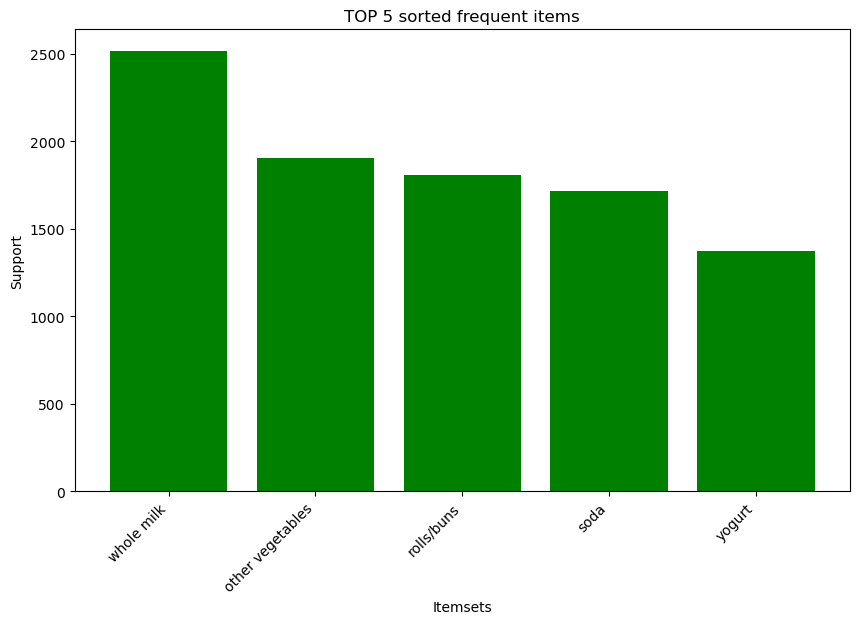

In [15]:
plt.figure(figsize=(10,6))
plt.bar(item_names,support_values,color='g')
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("TOP 5 sorted frequent items")
plt.xticks(rotation=45,ha='right')
plt.show()

### for another dataset

In [16]:
new_df = pd.read_csv('1000i.csv')

In [17]:
new_df.columns = ["Receipt", "Food", "Quantity"]

In [18]:
new_df.head()

,Receipt,Food,Quantity
0,1,4,15
1,1,2,49
2,1,5,44
3,2,1,1
4,2,2,19


In [19]:
new_df.isna().sum()

Receipt     0
Food        0
Quantity    0
dtype: int64

In [20]:
new_df.shape

(3537, 3)

In [21]:
new_df.describe()

,Receipt,Food,Quantity
count,3537.000000,3537.000000,3537.000000
mean,498.145321,2.986146,24.223353
std,289.283458,1.403204,14.722389
min,1.000000,1.000000,0.000000
25%,244.000000,2.000000,12.000000
50%,496.000000,3.000000,24.000000
75%,754.000000,4.000000,37.000000
max,1000.000000,5.000000,49.000000


In [22]:
new_df['Food'] = new_df["Food"].map({1:"milk", 2:"sugar", 3:"chocolate", 4:"apples", 5:"curd"})

In [23]:
new_df.head(2)

,Receipt,Food,Quantity
0,1,apples,15
1,1,sugar,49


In [24]:
li = []

for i in new_df["Receipt"].unique():
    li.append([])

In [25]:
for i in range(new_df.shape[0]):
    li[new_df["Receipt"][i] - 1].append(new_df["Food"][i])

In [26]:
li

[['apples', 'sugar', 'curd'],
 ['milk', 'sugar'],
 ['milk', 'milk'],
 ['milk', 'milk', 'curd', 'curd', 'milk', 'milk'],
 ['apples', 'apples', 'sugar', 'curd', 'curd'],
 ['sugar', 'apples', 'chocolate'],
 ['apples', 'chocolate', 'sugar', 'milk', 'milk', 'milk'],
 ['curd', 'milk', 'chocolate'],
 ['chocolate', 'milk'],
 ['curd', 'sugar', 'milk'],
 ['apples', 'curd', 'milk', 'sugar', 'curd'],
 ['milk', 'apples', 'chocolate'],
 ['apples'],
 ['sugar', 'chocolate', 'sugar'],
 ['curd', 'chocolate', 'apples'],
 ['sugar', 'sugar', 'milk'],
 ['sugar', 'milk', 'sugar', 'curd', 'chocolate', 'chocolate'],
 ['sugar', 'curd', 'chocolate'],
 ['sugar', 'apples', 'sugar', 'curd'],
 ['apples', 'apples', 'apples', 'chocolate'],
 ['apples', 'chocolate', 'milk', 'curd'],
 ['sugar', 'milk', 'chocolate'],
 ['chocolate', 'curd'],
 ['apples', 'apples', 'curd'],
 ['chocolate', 'chocolate', 'milk'],
 ['curd', 'apples', 'sugar'],
 ['curd', 'sugar', 'apples', 'sugar', 'apples'],
 ['sugar', 'apples'],
 ['apples', 'mi

#### Taking minimum support threshold 0.02 and minimum confidence threshold 0.05

In [27]:
itemsets,rules = apriori(li, min_support=0.02, min_confidence=0.05)

In [28]:
itemsets

{1: {('apples',): 540,
  ('sugar',): 498,
  ('curd',): 493,
  ('milk',): 542,
  ('chocolate',): 506},
 2: {('apples', 'chocolate'): 250,
  ('apples', 'curd'): 264,
  ('apples', 'milk'): 271,
  ('apples', 'sugar'): 258,
  ('chocolate', 'curd'): 231,
  ('chocolate', 'milk'): 251,
  ('chocolate', 'sugar'): 239,
  ('curd', 'milk'): 240,
  ('curd', 'sugar'): 230,
  ('milk', 'sugar'): 254},
 3: {('apples', 'chocolate', 'curd'): 112,
  ('apples', 'chocolate', 'milk'): 120,
  ('apples', 'chocolate', 'sugar'): 116,
  ('apples', 'curd', 'milk'): 120,
  ('apples', 'curd', 'sugar'): 122,
  ('apples', 'milk', 'sugar'): 124,
  ('chocolate', 'curd', 'milk'): 115,
  ('chocolate', 'curd', 'sugar'): 115,
  ('chocolate', 'milk', 'sugar'): 109,
  ('curd', 'milk', 'sugar'): 98},
 4: {('apples', 'chocolate', 'curd', 'milk'): 56,
  ('apples', 'chocolate', 'curd', 'sugar'): 57,
  ('apples', 'chocolate', 'milk', 'sugar'): 53,
  ('apples', 'curd', 'milk', 'sugar'): 53,
  ('chocolate', 'curd', 'milk', 'sugar'): 

In [29]:
rules

[{chocolate} -> {apples},
 {apples} -> {chocolate},
 {curd} -> {apples},
 {apples} -> {curd},
 {milk} -> {apples},
 {apples} -> {milk},
 {sugar} -> {apples},
 {apples} -> {sugar},
 {curd} -> {chocolate},
 {chocolate} -> {curd},
 {milk} -> {chocolate},
 {chocolate} -> {milk},
 {sugar} -> {chocolate},
 {chocolate} -> {sugar},
 {milk} -> {curd},
 {curd} -> {milk},
 {sugar} -> {curd},
 {curd} -> {sugar},
 {sugar} -> {milk},
 {milk} -> {sugar},
 {chocolate, curd} -> {apples},
 {apples, curd} -> {chocolate},
 {apples, chocolate} -> {curd},
 {curd} -> {apples, chocolate},
 {chocolate} -> {apples, curd},
 {apples} -> {chocolate, curd},
 {chocolate, milk} -> {apples},
 {apples, milk} -> {chocolate},
 {apples, chocolate} -> {milk},
 {milk} -> {apples, chocolate},
 {chocolate} -> {apples, milk},
 {apples} -> {chocolate, milk},
 {chocolate, sugar} -> {apples},
 {apples, sugar} -> {chocolate},
 {apples, chocolate} -> {sugar},
 {sugar} -> {apples, chocolate},
 {chocolate} -> {apples, sugar},
 {apple

#### taking minimum support threadhold 0.1 and minimum confidence threshold 0.2

In [30]:
itemsets,rules = apriori(li, min_support=0.1, min_confidence=0.2)

In [31]:
itemsets

{1: {('apples',): 540,
  ('sugar',): 498,
  ('curd',): 493,
  ('milk',): 542,
  ('chocolate',): 506},
 2: {('apples', 'chocolate'): 250,
  ('apples', 'curd'): 264,
  ('apples', 'milk'): 271,
  ('apples', 'sugar'): 258,
  ('chocolate', 'curd'): 231,
  ('chocolate', 'milk'): 251,
  ('chocolate', 'sugar'): 239,
  ('curd', 'milk'): 240,
  ('curd', 'sugar'): 230,
  ('milk', 'sugar'): 254},
 3: {('apples', 'chocolate', 'curd'): 112,
  ('apples', 'chocolate', 'milk'): 120,
  ('apples', 'chocolate', 'sugar'): 116,
  ('apples', 'curd', 'milk'): 120,
  ('apples', 'curd', 'sugar'): 122,
  ('apples', 'milk', 'sugar'): 124,
  ('chocolate', 'curd', 'milk'): 115,
  ('chocolate', 'curd', 'sugar'): 115,
  ('chocolate', 'milk', 'sugar'): 109}}

In [32]:
rules

[{chocolate} -> {apples},
 {apples} -> {chocolate},
 {curd} -> {apples},
 {apples} -> {curd},
 {milk} -> {apples},
 {apples} -> {milk},
 {sugar} -> {apples},
 {apples} -> {sugar},
 {curd} -> {chocolate},
 {chocolate} -> {curd},
 {milk} -> {chocolate},
 {chocolate} -> {milk},
 {sugar} -> {chocolate},
 {chocolate} -> {sugar},
 {milk} -> {curd},
 {curd} -> {milk},
 {sugar} -> {curd},
 {curd} -> {sugar},
 {sugar} -> {milk},
 {milk} -> {sugar},
 {chocolate, curd} -> {apples},
 {apples, curd} -> {chocolate},
 {apples, chocolate} -> {curd},
 {curd} -> {apples, chocolate},
 {chocolate} -> {apples, curd},
 {apples} -> {chocolate, curd},
 {chocolate, milk} -> {apples},
 {apples, milk} -> {chocolate},
 {apples, chocolate} -> {milk},
 {milk} -> {apples, chocolate},
 {chocolate} -> {apples, milk},
 {apples} -> {chocolate, milk},
 {chocolate, sugar} -> {apples},
 {apples, sugar} -> {chocolate},
 {apples, chocolate} -> {sugar},
 {sugar} -> {apples, chocolate},
 {chocolate} -> {apples, sugar},
 {apple

#### plotting the most frequent item

In [33]:
unique_food = new_df["Food"].unique()

In [34]:
unique_food

array(['apples', 'sugar', 'curd', 'milk', 'chocolate'], dtype=object)

In [35]:
count = {}

for i in range(new_df.shape[0]):
    if new_df["Food"][i] not in count:
        count[new_df["Food"][i]] = new_df["Quantity"][i]
    else:
        count[new_df["Food"][i]] = new_df["Quantity"][i] + count[new_df["Food"][i]]

In [36]:
count

{'apples': 19337,
 'sugar': 16351,
 'curd': 16273,
 'milk': 16910,
 'chocolate': 16807}

In [37]:
count = pd.Series(count)

Text(0, 0.5, 'Frquency')

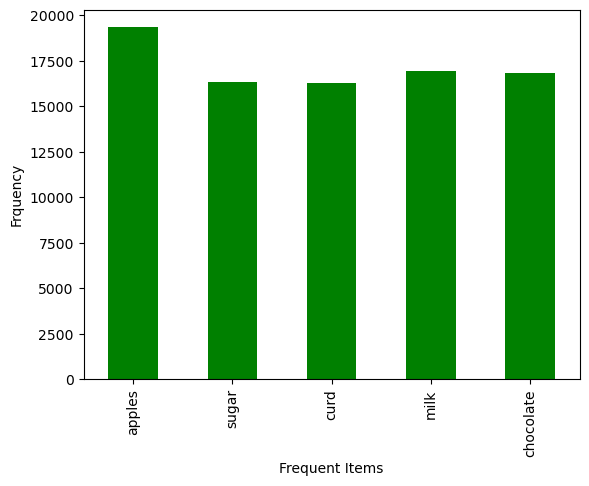

In [38]:
plt.figure()
count.plot(kind="bar",color='g')
plt.xlabel("Frequent Items")
plt.ylabel("Frquency")